In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
import cv2

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [8]:
import matplotlib.pyplot as plt 

In [9]:
path="C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/"

In [10]:
path

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/'

In [11]:
path_angry=path+"angry/"

In [12]:
path_angry

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/angry/'

In [13]:
path_disgust=path+"disgust/"

In [14]:
path_fear=path+"fear/"

In [15]:
path_happy=path+"happy/"

In [16]:
path_neutral=path+"neutral/"

In [17]:
path_sad=path+"sad/"

In [18]:
path_surprise=path+"surprise/"

In [19]:
path_disgust

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/disgust/'

In [20]:
path_fear

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/fear/'

In [21]:
path_happy

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/happy/'

In [22]:
path_neutral

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/neutral/'

In [23]:
path_sad

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/sad/'

In [24]:
path_surprise

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/surprise/'

In [25]:
namelist=["angry","disgust","fear","happy","neutral","sad","surprise"]

In [26]:
namelist

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [27]:
path_list=[path_angry,path_disgust,path_fear,path_happy,path_neutral,path_sad,path_surprise]

In [28]:
"img_"+namelist[0]

'img_angry'

In [29]:
path_list[0]

'C:/Users/Legion/OneDrive/Desktop/data/Facial_Emotion/Facial_Emotion/angry/'

In [30]:
img_dataset=[]
img_label=[]

In [31]:
for i in range(len(path_list)):
     image_name = os.listdir(path_list[i])
     for img in image_name:
        image=cv2.imread(path_list[i]+img)
        image=cv2.resize(image,(40,40))
        img_dataset.append(np.array(image))
        img_label.append(i)
        

In [32]:
len(img_dataset)

28888

In [33]:
len(img_label)

28888

In [34]:
img_dataset_array=np.array(img_dataset)
img_label_array=np.array(img_label)

In [35]:
type(img_dataset_array)

numpy.ndarray

In [36]:
type(img_label_array)

numpy.ndarray

# Scale

In [37]:
img_label_array.max()

6

In [38]:
img_dataset_array/255.0

array([[[[0.28235294, 0.28235294, 0.28235294],
         [0.30196078, 0.30196078, 0.30196078],
         [0.29803922, 0.29803922, 0.29803922],
         ...,
         [0.21960784, 0.21960784, 0.21960784],
         [0.18039216, 0.18039216, 0.18039216],
         [0.16078431, 0.16078431, 0.16078431]],

        [[0.23137255, 0.23137255, 0.23137255],
         [0.22352941, 0.22352941, 0.22352941],
         [0.22352941, 0.22352941, 0.22352941],
         ...,
         [0.20392157, 0.20392157, 0.20392157],
         [0.20784314, 0.20784314, 0.20784314],
         [0.18431373, 0.18431373, 0.18431373]],

        [[0.16862745, 0.16862745, 0.16862745],
         [0.18823529, 0.18823529, 0.18823529],
         [0.23137255, 0.23137255, 0.23137255],
         ...,
         [0.16470588, 0.16470588, 0.16470588],
         [0.18823529, 0.18823529, 0.18823529],
         [0.18039216, 0.18039216, 0.18039216]],

        ...,

        [[0.30588235, 0.30588235, 0.30588235],
         [0.19607843, 0.19607843, 0.19607843]

In [39]:
img_dataset_scale=img_dataset_array/255.0

In [40]:
X=img_dataset_scale

In [41]:
y=img_label_array

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


In [44]:
X_train.shape

(23110, 40, 40, 3)

In [45]:
X_test.shape

(5778, 40, 40, 3)

In [46]:
X_test.max()

1.0

In [47]:
smodel=Sequential()

In [48]:
smodel.add(Input(shape=(40,40,3)))

In [49]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

In [50]:
smodel.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

In [51]:
smodel.add(Flatten())

In [52]:
smodel.add(Dense(32,activation="relu"))

In [53]:
smodel.add(Dense(64,activation="relu"))

In [54]:
smodel.add(Dense(7,activation="softmax"))

In [55]:
smodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 19, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 19, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [56]:
smodel.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [57]:
smodel.fit(X_train,y_train,epochs=10)

Epoch 1/10
723/723 [==============================] - 24s 32ms/step - loss: 1.8465 - accuracy: 0.2429
Epoch 2/10
723/723 [==============================] - 23s 31ms/step - loss: 1.5864 - accuracy: 0.3888
Epoch 3/10
723/723 [==============================] - 23s 31ms/step - loss: 1.4071 - accuracy: 0.4617
Epoch 4/10
723/723 [==============================] - 23s 31ms/step - loss: 1.3063 - accuracy: 0.4980
Epoch 5/10
723/723 [==============================] - 23s 32ms/step - loss: 1.2275 - accuracy: 0.5284
Epoch 6/10
723/723 [==============================] - 23s 32ms/step - loss: 1.1602 - accuracy: 0.5511
Epoch 7/10
723/723 [==============================] - 27s 38ms/step - loss: 1.1170 - accuracy: 0.5678
Epoch 8/10
723/723 [==============================] - 25s 34ms/step - loss: 1.0798 - accuracy: 0.5835
Epoch 9/10
723/723 [==============================] - 25s 35ms/step - loss: 1.0455 - accuracy: 0.5987
Epoch 10/10
723/723 [==============================] - 26s 36ms/step - loss: 1.013

In [58]:
smodel.evaluate(X_test,y_test)

181/181 [==============================] - 1s 7ms/step - loss: 1.1240 - accuracy: 0.5618


[1.123998761177063, 0.5617860555648804]

In [74]:
X_train[1234]

array([[[0.18039216, 0.18039216, 0.18039216],
        [0.15294118, 0.15294118, 0.15294118],
        [0.14509804, 0.14509804, 0.14509804],
        ...,
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.17254902, 0.17254902, 0.17254902],
        [0.12156863, 0.12156863, 0.12156863]],

       [[0.17254902, 0.17254902, 0.17254902],
        [0.14509804, 0.14509804, 0.14509804],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.13333333, 0.13333333, 0.13333333],
        [0.17254902, 0.17254902, 0.17254902],
        [0.1372549 , 0.1372549 , 0.1372549 ]],

       [[0.15686275, 0.15686275, 0.15686275],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.14509804, 0.14509804, 0.14509804],
        ...,
        [0.1372549 , 0.1372549 , 0.1372549 ],
        [0.17647059, 0.17647059, 0.17647059],
        [0.15686275, 0.15686275, 0.15686275]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [75]:
X_train.shape

(23110, 40, 40, 3)

In [76]:
X_train[1234].shape

(40, 40, 3)

In [77]:
p_img=X_train[1234].reshape((1,)+X_train[1234].shape)

In [78]:
smodel.predict(p_img)

1/1 [==============================] - 0s 18ms/step


array([[0.27740592, 0.00108667, 0.08409794, 0.030789  , 0.2533573 ,
        0.33205023, 0.02121289]], dtype=float32)

In [79]:
np.argmax(smodel.predict(p_img))

1/1 [==============================] - 0s 18ms/step


5

In [81]:
namelist[5]

'sad'

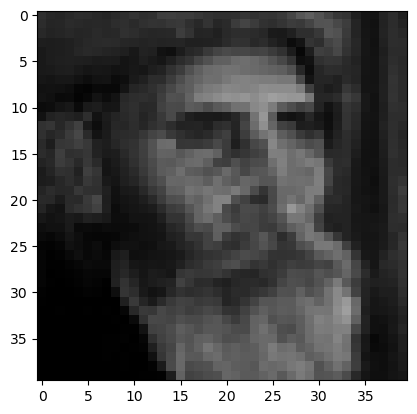

In [82]:
plt.imshow(X_train[1234])

In [83]:
X_test[1234]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.89803922, 0.89803922, 0.89803922],
        [0.97254902, 0.97254902, 0.97254902],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [0.95294118, 0.95294118, 0.95294118],
        ...,
        [0.8       , 0.8       , 0.8       ],
        [0.95294118, 0.95294118, 0.95294118],
        [0.98823529, 0.98823529, 0.98823529]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.98823529, 0.98823529, 0.98823529],
        [0.83921569, 0.83921569, 0.83921569],
        ...,
        [0.70196078, 0.70196078, 0.70196078],
        [0.89019608, 0.89019608, 0.89019608],
        [0.98431373, 0.98431373, 0.98431373]],

       ...,

       [[0.3254902 , 0.3254902 , 0.3254902 ],
        [0.2627451 , 0.2627451 , 0.2627451 ],
        [0.18431373, 0